# Description:
In this project, I used AddHealth data, which contains data about adolescents whose ages are between 12 and 21. Nowadays, one of the most prevalent mental disorders among adolescents is commiting suicide. In this project, I am going to find the relationship between suicide and other factors that may have impacts on committing suicide among adolescents.

In [21]:
import pandas as pd
import numpy as np
import seaborn

# Reading data:

In [22]:
data = pd.read_csv('AddHealth.csv', low_memory=False)

# Data cleaning:

For data cleaning, I needed to define new variables based on the main variables. For example, I defined a new variable called 'numtrysuic' based on another variable called 'H1SU2' which shows the number of suicide attempts in the past 12 month. In this variable there are two groups that one  of them is for those who have not tried to suicide in the past 12 months, and the other one is for those who have never attempted or thought about suicide. I combined these two groups and considered them as a single group that shows the number of individuals who have tried 0 times to suicide in the past 12 month in the 'numtrysuic' variable.

I also considered the responses whose respondents did not know about the question or rejected to answer as missiing data nad replaced them with NAN.

In [23]:
data['H1SU2'] = pd.to_numeric(data['H1SU2'],errors='coerce')
def numtrysuic(row):
    if row['H1SU2']== 7:
        return 0        
    if row['H1SU2']== 0:
        return 0
    if row['H1SU2']== 1:
        return 1
    if row['H1SU2']== 2:
        return 2
    if row['H1SU2']== 3:
        return 3
    if row['H1SU2']== 4:
        return 4
    if row['H1SU2']== 6:
        return np.nan
    if row['H1SU2']== 8:
        return np.nan
data['numtrysuic'] = data.apply(lambda row:numtrysuic(row), axis =1 )
data['numtrysuic']= pd.to_numeric(data['numtrysuic'])

In [24]:
data['friendsuic'] = pd.to_numeric(data['H1SU4'],errors='coerce')
data['friendsuic']= data['friendsuic'].replace([6, 8, 9], np.nan)

In [25]:
data['familysuic'] = pd.to_numeric(data['H1SU6'],errors='coerce')
data["familysuic"]= data["familysuic"].replace([6, 8, 9], np.nan)

In [26]:
data['depression'] = pd.to_numeric(data['H1FS6'],errors='coerce')
data["depression"]= data["depression"].replace([6, 8], np.nan)

In [27]:
data['marijuana'] = pd.to_numeric(data['H1TO32'],errors='coerce')
data["marijuana"]= data["marijuana"].replace([996, 998, 999], np.nan)
data["marijuana"]= data["marijuana"].replace(997, 0)

In [28]:
data['illegaldrugs'] = pd.to_numeric(data['H1TO42'],errors='coerce')
data["illegaldrugs"]= data["illegaldrugs"].replace([996, 998, 999], np.nan)
data['illegaldrugs']= data['illegaldrugs'].replace(997, 0)

In [29]:
data['availgun'] = pd.to_numeric(data['H1TO53'],errors='coerce')
data["availgun"]= data["availgun"].replace([6, 8, 9], np.nan)

In [31]:
data['H1PF5'] = pd.to_numeric(data['H1PF5'],errors='coerce')
def relmom(row):
    if row['H1PF5']== 3:
        return 3        
    if row['H1PF5']== 7:
        return 3
    if row['H1PF5']== 4:
        return 1
    if row['H1PF5']== 3:
        return 2
    if row['H1PF5']== 2:
        return 4
    if row['H1PF5']== 1:
        return 5
    if row['H1PF5']== 6:
        return np.nan
    if row['H1PF5']== 8:
        return np.nan
data['relmom'] = data.apply(lambda row:relmom(row), axis =1 )
data['relmom']= pd.to_numeric(data['relmom'])

In [32]:
data['H1PF25'] = pd.to_numeric(data['H1PF25'],errors='coerce')
def reldad(row):
    if row['H1PF25']== 3:
        return 3        
    if row['H1PF25']== 7:
        return 3
    if row['H1PF25']== 4:
        return 1
    if row['H1PF25']== 3:
        return 2
    if row['H1PF25']== 2:
        return 4
    if row['H1PF25']== 1:
        return 5
    if row['H1PF25']== 6:
        return np.nan
    if row['H1PF25']== 8:
        return np.nan
data['reldad'] = data.apply(lambda row:reldad(row), axis =1 )
data['reldad']= pd.to_numeric(data['reldad'])

In [33]:
data['H1TO18'] = pd.to_numeric(data['H1TO18'],errors='coerce')
def highlydrunk(row):
    if row['H1TO18']== 7:
        return 0        
    if row['H1TO18']== 97:
        return 0
    if row['H1TO18']== 6:
        return 1
    if row['H1TO18']== 5:
        return 2
    if row['H1TO18']== 4:
        return 3
    if row['H1TO18']== 3:
        return 4
    if row['H1TO18']== 2:
        return 5
    if row['H1TO18']== 1:
        return 6
    if row['H1TO18']== 96:
        return np.nan
    if row['H1TO18']== 98:
        return np.nan
data['highlydrunk'] = data.apply(lambda row:highlydrunk(row), axis =1 )
data['highlydrunk']= pd.to_numeric(data['highlydrunk'])

# Data visualization:

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore')

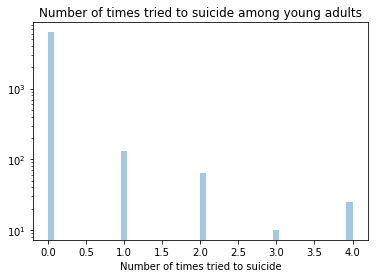

count    6500.000000
mean        0.059846
std         0.362439
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.000000
Name: numtrysuic, dtype: float64


In [36]:
sns.distplot(data['numtrysuic'].dropna(), kde= False) 
plt.yscale('log')
plt.xlabel('Number of times tried to suicide')
plt.title('Number of times tried to suicide among young adults')
plt.show()
descNumSuicide= data['numtrysuic'].describe()
print(descNumSuicide)

In [10]:
plt2= seaborn.factorplot(x='familysuic', y = 'numtrysuic', data= data, kind= "bar", ci =None) #kind='bar ' means bar chart
plt.xlabel('Having any family members who have ever tried to suicide')
plt.ylabel('Number of times tried to suicide')
plt.show()

C:\Users\asgha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'familysuic'

In [11]:
plt3= seaborn.factorplot(x='depression', y = 'numtrysuic', data= data, kind= "bar", ci =None) #kind='bar ' means bar chart
plt.xlabel('Depression')
plt.ylabel('Number of times tried to suicide')
plt.show()


C:\Users\asgha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'depression'

In [12]:
plt4= seaborn.factorplot(x='relmom', y = 'numtrysuic', data= data, kind= "bar", ci =None) #kind='bar ' means bar chart
plt.xlabel('Satisfication of their relationship with their mother')
plt.ylabel('Number of times tried to suicide')
plt.show()

C:\Users\asgha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'relmom'

In [13]:
plt5= seaborn.factorplot(x='reldad', y = 'numtrysuic', data= data, kind= "bar", ci =None) #kind='bar ' means bar chart
plt.xlabel('Satisfication of their relationship with their father')
plt.ylabel('Number of times tried to suicide')
plt.show()

C:\Users\asgha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


ValueError: Could not interpret input 'reldad'

In [14]:
plt.subplots(figsize=(15,5))
scat1= seaborn.regplot(x='highlydrunk', y='numtrysuic', fit_reg = False, data=data )# best line fitted to ccater plot will not draw
plt.xlabel('Number of days highly drunk in the past 12 month')
plt.ylabel('Number of times tried to suicide')
plt.title('Association between Number of days highly drunk in the past 12 month and the Number of times tried to suicide')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
plt.show()

NameError: name 'plt' is not defined

In [15]:
scat2= seaborn.regplot(x='marijuana', y='numtrysuic', fit_reg = False, data=data )# best line fitted to ccater plot will not draw
plt.xlabel('Number of times used Marijuana in past 30 days')
plt.ylabel('Number of times tried to suicide')
plt.title('Association between Number of times used Marijuana in past 30 days and the Number of times tried to suicide')
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()

KeyError: 'marijuana'

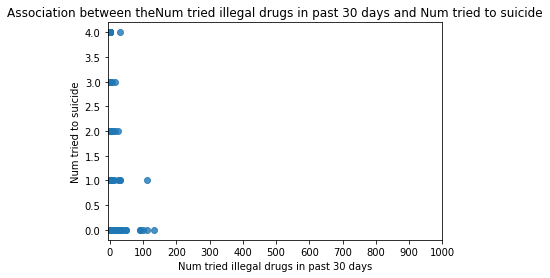

In [267]:
scat3= seaborn.regplot(x='illegaldrugs', y='numtrysuic', fit_reg = False, data=data )# best line fitted to ccater plot will not draw
plt.xlabel('Number of times used illegal drugs in past 30 days')
plt.ylabel('Number of times tried to suicide')
plt.title('Association between Number of times used illegal drugs in past 30 days and the Number of times tried to suicide')
plt.xticks([0,100,200,300,400,500,600,700,800,900,1000])
plt.show()